 این پروژه یک مدل یادگیری عمیق برای تشخیص ارقام دست‌نویس است که با استفاده از شبکه‌های عصبی چندلایه (MLP) و شبکه‌های عصبی کانولوشن (CNN) ساخته شده است. هدف اصلی پروژه، آموزش و ارزیابی مدل‌های مختلف برای افزایش دقت طبقه‌بندی ارقام و بررسی تکنیک‌های کاهش بیش‌برازش (overfitting) مانند Dropout، L2 Regularization و Early Stopping می‌باشد. این پروژه با استفاده از دیتاست Digits از کتابخانه scikit-learn انجام شده و شامل مراحل آماده‌سازی داده، آموزش مدل، ارزیابی عملکرد و مقایسه نتایج می‌باشد. نتایج به دست آمده نشان‌دهنده بهبود قابل توجه دقت با استفاده از شبکه‌های کانولوشن و تکنیک‌های منظم‌سازی است که می‌تواند در کاربردهای واقعی تشخیص تصویر مفید واقع شود.

This project is a deep learning model for handwritten digit recognition built using multilayer perceptron (MLP) and convolutional neural networks (CNN). The main goal of the project is to train and evaluate different models to improve digit classification accuracy and to explore overfitting reduction techniques such as Dropout, L2 Regularization, and Early Stopping. The project uses the Digits dataset from the scikit-learn library and includes data preprocessing, model training, performance evaluation, and result comparison. The obtained results demonstrate significant accuracy improvement using convolutional networks and regularization techniques, which can be beneficial in real-world image recognition applications.

#اتصال کلب به گوگل درایو

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#ایمپورت کتابخانه‌های مورد نیاز


In [29]:
# ایمپورت کتابخانه‌های مورد نیاز

import numpy as np
# NumPy: کتابخانه‌ای برای عملیات عددی و کار با آرایه‌ها و ماتریس‌ها که سرعت و کارایی بالایی دارد و پایه بسیاری از کتابخانه‌های یادگیری ماشین است.

import matplotlib.pyplot as plt
# Matplotlib.pyplot: کتابخانه‌ای برای رسم نمودارها و مصورسازی داده‌ها در پایتون.

from sklearn.datasets import load_digits
# load_digits: تابعی برای بارگذاری دیتاست ارقام دست‌نویس (Digits) از مجموعه داده‌های آماده scikit-learn.

from sklearn.model_selection import train_test_split
# train_test_split: تابعی برای تقسیم داده‌ها به دو مجموعه آموزش و تست به صورت تصادفی.

from sklearn.preprocessing import StandardScaler
# StandardScaler: ابزاری برای نرمال‌سازی داده‌ها که ویژگی‌ها را به صورت میانگین صفر و واریانس یک تبدیل می‌کند.

from sklearn.neural_network import MLPClassifier
# MLPClassifier: کلاس مدل شبکه عصبی چندلایه (Multi-Layer Perceptron) برای مسائل طبقه‌بندی.

from sklearn.metrics import classification_report, confusion_matrix
# classification_report: برای گزارش معیارهای ارزیابی مدل مانند دقت، بازخوانی و F1-score.
# confusion_matrix: برای ساخت ماتریس درهم‌ریختگی که خطاهای طبقه‌بندی را نشان می‌دهد.

print('Libraries installed and imported successfully')
# چاپ پیغام موفقیت‌آمیز بودن ایمپورت کتابخانه‌ها.


Libraries installed and imported successfully


#بارگذاری دیتاست
#نمایش اطلاعات اولیه
دریافت مجموعه داده (غیر از Keras)





شکل داده‌ها (X): (1797, 64)
شکل تصاویر: (1797, 8, 8)
تعداد نمونه‌ها: 1797
تعداد کلاس‌ها: 10
برچسب‌های کلاس: [0 1 2 3 4 5 6 7 8 9]


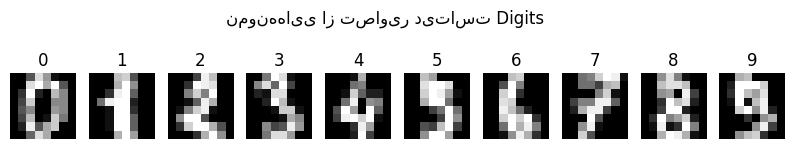

In [30]:
from sklearn.datasets import load_digits  # ایمپورت تابع بارگذاری دیتاست ارقام دست‌نویس از scikit-learn
import matplotlib.pyplot as plt           # ایمپورت ابزار رسم نمودار و مصورسازی داده‌ها

# بارگذاری دیتاست
digits = load_digits()                    # بارگذاری دیتاست digits و ذخیره آن به صورت یک شی دیکشنری مانند

# نمایش اطلاعات اولیه
print("شکل داده‌ها (X):", digits.data.shape)      # چاپ ابعاد داده ویژگی‌ها (تعداد نمونه، تعداد ویژگی هر نمونه)
print("شکل تصاویر:", digits.images.shape)         # چاپ ابعاد تصاویر خام (تعداد نمونه، ابعاد هر تصویر)
print("تعداد نمونه‌ها:", len(digits.data))        # چاپ تعداد کل نمونه‌ها در دیتاست
print("تعداد کلاس‌ها:", len(set(digits.target)))  # چاپ تعداد کلاس‌های موجود (اعداد ۰ تا ۹)
print("برچسب‌های کلاس:", digits.target_names)     # چاپ لیست برچسب‌های کلاس (اعداد ۰ تا ۹)

# نمایش 10 تصویر نمونه با برچسب واقعی
fig, axes = plt.subplots(1, 10, figsize=(10, 2))  # ساخت یک پنجره با ۱۰ زیرنمودار افقی برای نمایش تصاویر
for i, ax in enumerate(axes):                     # تکرار روی هر زیرنمودار و اندیس آن
    ax.imshow(digits.images[i], cmap='gray')      # نمایش تصویر iام به صورت سیاه و سفید
    ax.set_title(digits.target[i])                # تنظیم عنوان هر تصویر با برچسب واقعی آن
    ax.axis('off')                                # حذف محورهای اطراف تصویر برای زیبایی بیشتر
plt.suptitle('نمونه‌هایی از تصاویر دیتاست Digits') # عنوان کلی برای کل پنجره تصاویر
plt.show()                                        # نمایش پنجره تصاویر


بارگذاری [دیتاست]#
آماده‌سازی داده برای آموزش و تست (train/test split)#
#نرمال‌سازی ویژگی‌ها
#نمایش ابعاد داده‌ها برای اطمینان



In [31]:
from sklearn.datasets import load_digits  # ایمپورت تابع بارگذاری دیتاست ارقام دست‌نویس از scikit-learn
from sklearn.model_selection import train_test_split  # ایمپورت تابع تقسیم داده به آموزش و تست
from sklearn.preprocessing import StandardScaler  # ایمپورت ابزار نرمال‌سازی ویژگی‌ها

# بارگذاری دیتاست
digits = load_digits()  # بارگذاری دیتاست digits و ذخیره آن به صورت یک شی دیکشنری مانند
X = digits.data        # استخراج داده ویژگی‌ها (هر نمونه به صورت یک بردار 64تایی)
y = digits.target      # استخراج برچسب هر نمونه (عدد واقعی 0 تا 9)

# تقسیم داده به آموزش (80%) و آزمون (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,                   # داده ویژگی‌ها
    y,                   # برچسب‌ها
    test_size=0.2,       # 20 درصد داده‌ها برای تست، 80 درصد برای آموزش
    random_state=42      # مقدار ثابت برای تکرارپذیری تقسیم داده‌ها
)

# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()         # ساخت یک شیء StandardScaler برای نرمال‌سازی داده‌ها
X_train = scaler.fit_transform(X_train)  # آموزش نرمال‌ساز روی داده آموزش و تبدیل داده آموزش
X_test = scaler.transform(X_test)        # تبدیل داده تست با همان پارامترهای آموزش دیده

# نمایش ابعاد داده‌ها برای اطمینان
print("ابعاد داده آموزش:", X_train.shape)    # چاپ ابعاد داده آموزش (تعداد نمونه، تعداد ویژگی)
print("ابعاد داده آزمون:", X_test.shape)     # چاپ ابعاد داده تست
print("ابعاد برچسب آموزش:", y_train.shape)   # چاپ تعداد برچسب‌های آموزش
print("ابعاد برچسب آزمون:", y_test.shape)    # چاپ تعداد برچسب‌های تست


ابعاد داده آموزش: (1437, 64)
ابعاد داده آزمون: (360, 64)
ابعاد برچسب آموزش: (1437,)
ابعاد برچسب آزمون: (360,)


آموزش مدل MLP#
مدل MLP با دو لایه مخفی ساخته شده و به صورت مرحله‌ای (epoch به epoch) آموزش داده شده است

---



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1: Train Acc=0.2102, Test Acc=0.2028, Loss=2.3886
Epoch 2: Train Acc=0.4294, Test Acc=0.4389, Loss=2.0398


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3: Train Acc=0.6242, Test Acc=0.6056, Loss=1.7261
Epoch 4: Train Acc=0.7244, Test Acc=0.7167, Loss=1.4291
Epoch 5: Train Acc=0.7822, Test Acc=0.8056, Loss=1.1571


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Epoch 6: Train Acc=0.8476, Test Acc=0.8389, Loss=0.9222
Epoch 7: Train Acc=0.8775, Test Acc=0.8694, Loss=0.7274
Epoch 8: Train Acc=0.9102, Test Acc=0.8944, Loss=0.5730
Epoch 9: Train Acc=0.9276, Test Acc=0.9111, Loss=0.4550
Epoch 10: Train Acc=0.9436, Test Acc=0.9222, Loss=0.3643
Epoch 11: Train Acc=0.9506, Test Acc=0.9278, Loss=0.2948


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 12: Train Acc=0.9569, Test Acc=0.9306, Loss=0.2418
Epoch 13: Train Acc=0.9673, Test Acc=0.9361, Loss=0.2006


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Epoch 14: Train Acc=0.9701, Test Acc=0.9361, Loss=0.1682
Epoch 15: Train Acc=0.9756, Test Acc=0.9444, Loss=0.1421
Epoch 16: Train Acc=0.9819, Test Acc=0.9472, Loss=0.1208
Epoch 17: Train Acc=0.9847, Test Acc=0.9500, Loss=0.1031
Epoch 18: Train Acc=0.9868, Test Acc=0.9528, Loss=0.0883
Epoch 19: Train Acc=0.9896, Test Acc=0.9556, Loss=0.0760
Epoch 20: Train Acc=0.9916, Test Acc=0.9694, Loss=0.0653
Epoch 21: Train Acc=0.9937, Test Acc=0.9722, Loss=0.0565
Epoch 22: Train Acc=0.9944, Test Acc=0.9778, Loss=0.0490
Epoch 23: Train Acc=0.9951, Test Acc=0.9806, Loss=0.0425
Epoch 24: Train Acc=0.9951, Test Acc=0.9833, Loss=0.0371


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Epoch 25: Train Acc=0.9965, Test Acc=0.9833, Loss=0.0322
Epoch 26: Train Acc=0.9965, Test Acc=0.9833, Loss=0.0281
Epoch 27: Train Acc=0.9972, Test Acc=0.9833, Loss=0.0246
Epoch 28: Train Acc=0.9972, Test Acc=0.9833, Loss=0.0213
Epoch 29: Train Acc=0.9979, Test Acc=0.9833, Loss=0.0186
Epoch 30: Train Acc=0.9986, Test Acc=0.9833, Loss=0.0162
Epoch 31: Train Acc=0.9986, Test Acc=0.9833, Loss=0.0142
Epoch 32: Train Acc=0.9993, Test Acc=0.9833, Loss=0.0123
Epoch 33: Train Acc=1.0000, Test Acc=0.9833, Loss=0.0107
Epoch 34: Train Acc=1.0000, Test Acc=0.9833, Loss=0.0093
Epoch 35: Train Acc=1.0000, Test Acc=0.9833, Loss=0.0082
Epoch 36: Train Acc=1.0000, Test Acc=0.9833, Loss=0.0071
Epoch 37: Train Acc=1.0000, Test Acc=0.9833, Loss=0.0062
Epoch 38: Train Acc=1.0000, Test Acc=0.9833, Loss=0.0054
Epoch 39: Train Acc=1.0000, Test Acc=0.9833, Loss=0.0047
Epoch 40: Train Acc=1.0000, Test Acc=0.9833, Loss=0.0041
Epoch 41: Train Acc=1.0000, Test Acc=0.9833, Loss=0.0036
Epoch 42: Train Acc=1.0000, Tes

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Epoch 44: Train Acc=1.0000, Test Acc=0.9806, Loss=0.0024
Epoch 45: Train Acc=1.0000, Test Acc=0.9806, Loss=0.0021
Epoch 46: Train Acc=1.0000, Test Acc=0.9806, Loss=0.0017
Epoch 47: Train Acc=1.0000, Test Acc=0.9806, Loss=0.0015
Epoch 48: Train Acc=1.0000, Test Acc=0.9806, Loss=0.0013
Epoch 49: Train Acc=1.0000, Test Acc=0.9806, Loss=0.0012
Epoch 50: Train Acc=1.0000, Test Acc=0.9806, Loss=0.0010


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

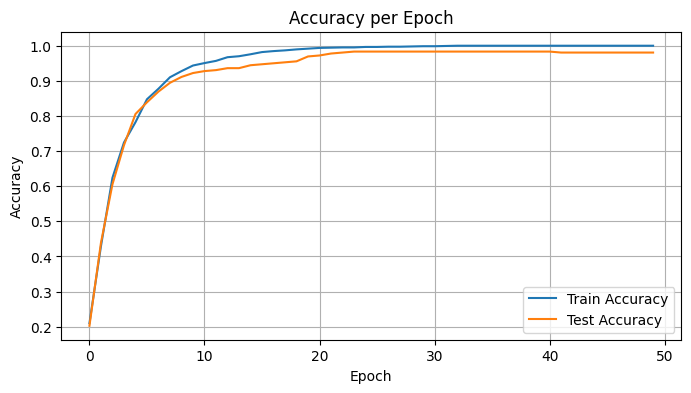

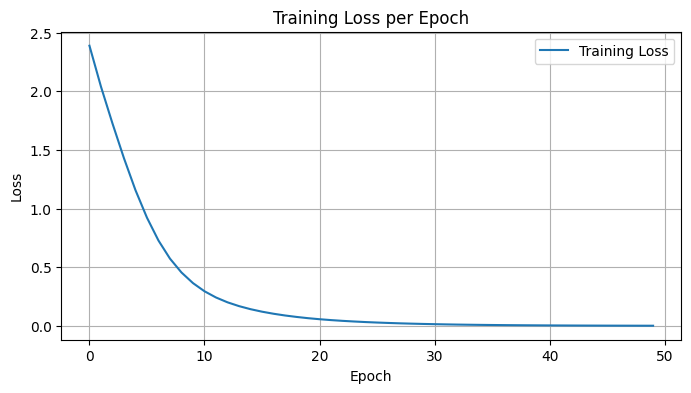

In [32]:
import numpy as np  # ایمپورت کتابخانه NumPy برای کار با آرایه‌ها و عملیات عددی
import matplotlib.pyplot as plt  # ایمپورت کتابخانه matplotlib برای رسم نمودارها
from sklearn.neural_network import MLPClassifier  # ایمپورت مدل شبکه عصبی چندلایه (MLP) برای طبقه‌بندی

n_epochs = 50  # تعیین تعداد epoch (دور آموزش) برای حلقه آموزش مرحله‌ای

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # دو لایه مخفی: اولی ۶۴ نورون، دومی ۳۲ نورون
    activation='relu',            # تابع فعال‌سازی ReLU برای لایه‌های مخفی
    solver='adam',                # الگوریتم بهینه‌ساز Adam
    max_iter=1,                   # هر بار فقط یک epoch آموزش داده می‌شود
    warm_start=True,              # حفظ وزن‌ها بین فراخوانی‌های متوالی fit
    random_state=42,              # مقدار ثابت برای تکرارپذیری
    verbose=False                 # عدم نمایش جزئیات آموزش در خروجی
)

train_acc_list = []  # لیست برای ذخیره دقت آموزش در هر epoch
test_acc_list = []   # لیست برای ذخیره دقت تست در هر epoch
loss_list = []       # لیست برای ذخیره مقدار loss در هر epoch

for epoch in range(n_epochs):  # حلقه آموزش مرحله‌ای به تعداد n_epochs
    mlp.fit(X_train, y_train)  # آموزش مدل فقط برای یک epoch
    train_acc = mlp.score(X_train, y_train)  # محاسبه دقت آموزش
    test_acc = mlp.score(X_test, y_test)    # محاسبه دقت تست
    train_acc_list.append(train_acc)        # ذخیره دقت آموزش در لیست
    test_acc_list.append(test_acc)          # ذخیره دقت تست در لیست
    loss_list.append(mlp.loss_)             # ذخیره مقدار loss فعلی در لیست
    print(f"Epoch {epoch+1}: Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}, Loss={mlp.loss_:.4f}")  # چاپ خلاصه هر epoch

plt.figure(figsize=(8,4))  # ساخت پنجره نمودار با اندازه مناسب
plt.plot(train_acc_list, label='Train Accuracy')  # رسم نمودار دقت آموزش
plt.plot(test_acc_list, label='Test Accuracy')    # رسم نمودار دقت تست
plt.xlabel('Epoch')           # برچسب محور افقی
plt.ylabel('Accuracy')        # برچسب محور عمودی
plt.title('Accuracy per Epoch')  # عنوان نمودار
plt.legend()                  # نمایش راهنمای نمودار
plt.grid(True)                # نمایش خطوط شبکه
plt.show()                    # نمایش نمودار

plt.figure(figsize=(8,4))     # ساخت پنجره جدید برای نمودار loss
plt.plot(loss_list, label='Training Loss')  # رسم نمودار loss
plt.xlabel('Epoch')           # برچسب محور افقی
plt.ylabel('Loss')            # برچسب محور عمودی
plt.title('Training Loss per Epoch')  # عنوان نمودار
plt.legend()                  # نمایش راهنمای نمودار
plt.grid(True)                # نمایش خطوط شبکه
plt.show()                    # نمایش نمودار


# پیش‌بینی روی داده آموزش و تست
# بررسی دقت مدل
# گزارش طبقه‌بندی روی داده تست
# ماتریس درهم‌ریختگی (Confusion Matrix)
# مصورسازی نمونه‌هایی که مدل اشتباه پیش‌بینی کرده است
# رسم نمودار دقت آموزش و تست در هر epoch
# رسم نمودار loss در طول آموزش




Train Accuracy: 1.0000
Test Accuracy:  0.9806

Classification Report on Test Data:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     1.0000    1.0000    1.0000        28
           2     0.9706    1.0000    0.9851        33
           3     1.0000    0.9706    0.9851        34
           4     0.9787    1.0000    0.9892        46
           5     0.9783    0.9574    0.9677        47
           6     0.9714    0.9714    0.9714        35
           7     1.0000    0.9706    0.9851        34
           8     0.9667    0.9667    0.9667        30
           9     0.9512    0.9750    0.9630        40

    accuracy                         0.9806       360
   macro avg     0.9817    0.9812    0.9813       360
weighted avg     0.9808    0.9806    0.9806       360



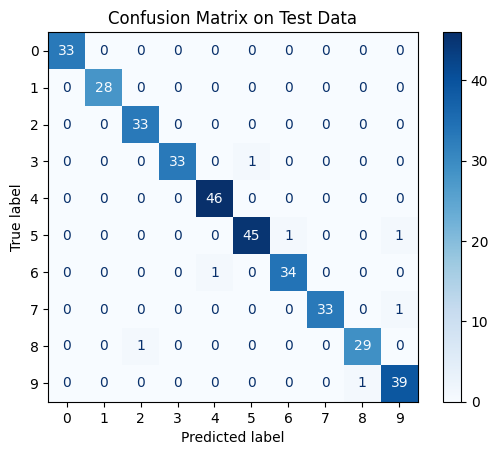


تعداد نمونه‌های اشتباه پیش‌بینی شده: 7


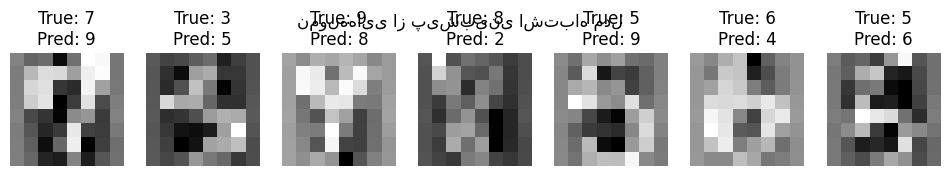

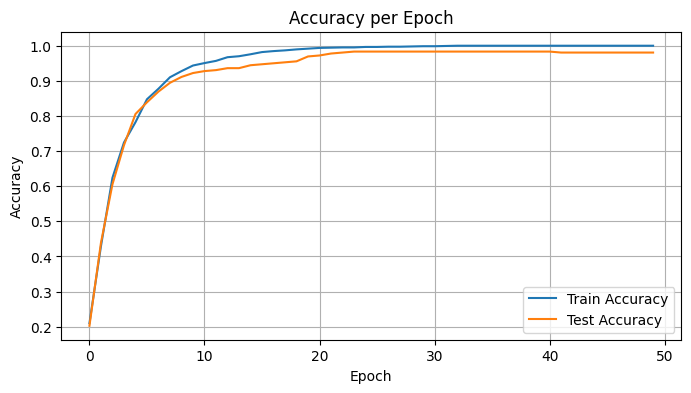

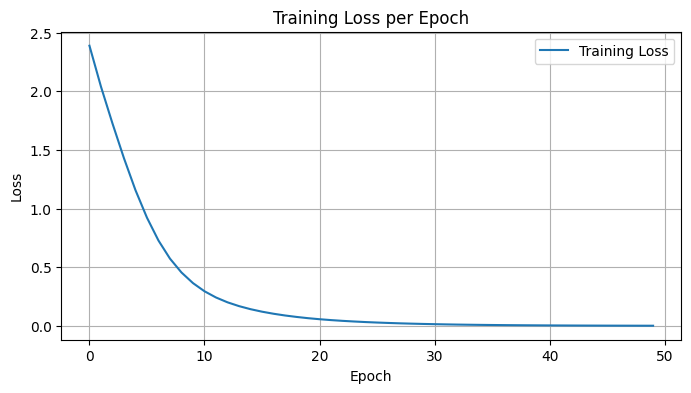

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# ایمپورت توابع ارزیابی مدل: دقت (accuracy)، گزارش طبقه‌بندی (classification_report)، ماتریس درهم‌ریختگی (confusion_matrix) و ابزار نمایش آن (ConfusionMatrixDisplay)

import matplotlib.pyplot as plt  # ایمپورت ابزار رسم نمودارها
import numpy as np               # ایمپورت کتابخانه آرایه‌ای NumPy

# پیش‌بینی روی داده آموزش و تست
y_pred_train = mlp.predict(X_train)  # پیش‌بینی برچسب‌های داده آموزش با مدل آموزش‌دیده
y_pred_test = mlp.predict(X_test)    # پیش‌بینی برچسب‌های داده تست با مدل آموزش‌دیده

# بررسی دقت مدل
train_acc = accuracy_score(y_train, y_pred_train)  # محاسبه دقت مدل روی داده آموزش
test_acc = accuracy_score(y_test, y_pred_test)     # محاسبه دقت مدل روی داده تست
print(f"Train Accuracy: {train_acc:.4f}")          # چاپ دقت آموزش
print(f"Test Accuracy:  {test_acc:.4f}")           # چاپ دقت تست

# گزارش طبقه‌بندی روی داده تست
print("\nClassification Report on Test Data:")     # چاپ تیتر گزارش طبقه‌بندی
print(classification_report(y_test, y_pred_test, digits=4))  # چاپ precision، recall، f1-score و support برای هر کلاس[1][5][8]

# ماتریس درهم‌ریختگی (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred_test)         # محاسبه ماتریس درهم‌ریختگی با مقایسه برچسب واقعی و پیش‌بینی[2][3]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))  # ساخت شیء نمایش ماتریس
disp.plot(cmap=plt.cm.Blues)                       # رسم ماتریس به صورت تصویری با رنگ آبی
plt.title("Confusion Matrix on Test Data")         # عنوان نمودار
plt.show()                                         # نمایش نمودار

# مصورسازی نمونه‌هایی که مدل اشتباه پیش‌بینی کرده است
wrong_idx = np.where(y_pred_test != y_test)[0]     # پیدا کردن ایندکس نمونه‌هایی که مدل اشتباه پیش‌بینی کرده
print(f"\nتعداد نمونه‌های اشتباه پیش‌بینی شده: {len(wrong_idx)}")  # چاپ تعداد اشتباهات مدل

if len(wrong_idx) > 0:
    n_show = min(10, len(wrong_idx))               # حداکثر ۱۰ نمونه اشتباه را نمایش بده
    fig, axes = plt.subplots(1, n_show, figsize=(12, 2))
    for i, ax in enumerate(axes):
        idx = wrong_idx[i]
        ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')  # نمایش تصویر اشتباه
        ax.set_title(f"True: {y_test[idx]}\nPred: {y_pred_test[idx]}")  # عنوان: مقدار واقعی و پیش‌بینی
        ax.axis('off')
    plt.suptitle('نمونه‌هایی از پیش‌بینی اشتباه مدل')
    plt.show()

# رسم نمودار دقت آموزش و تست در هر epoch
plt.figure(figsize=(8,4))
plt.plot(train_acc_list, label='Train Accuracy')   # رسم دقت آموزش در طول epochها
plt.plot(test_acc_list, label='Test Accuracy')     # رسم دقت تست در طول epochها
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# رسم نمودار loss در طول آموزش
plt.figure(figsize=(8,4))
plt.plot(loss_list, label='Training Loss')         # رسم loss آموزش در طول epochها
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


# بخش امتیازی

# تبدیل برچسب‌ها به one-hot
# بازسازی داده‌ها به شکل تصویری (8x8 پیکسل، تک کانال)
# ساخت مدل CNN ساده


In [34]:
import tensorflow as tf  # ایمپورت کتابخانه اصلی یادگیری عمیق TensorFlow
from tensorflow.keras import layers, models  # ایمپورت ماژول‌های لایه‌ها و مدل‌ها از Keras (رابط سطح بالای TensorFlow)
from tensorflow.keras.utils import to_categorical  # ایمپورت تابع تبدیل برچسب‌ها به one-hot

# تبدیل برچسب‌ها به one-hot
y_train_cnn = to_categorical(y_train)  # تبدیل برچسب‌های آموزش به آرایه one-hot (برای طبقه‌بندی چندکلاسه)
y_test_cnn = to_categorical(y_test)    # تبدیل برچسب‌های تست به آرایه one-hot

# بازسازی داده‌ها به شکل تصویری (8x8 پیکسل، تک کانال)
X_train_cnn = X_train.reshape(-1, 8, 8, 1)  # تبدیل داده آموزش به آرایه ۴بعدی (تعداد نمونه، ۸، ۸، ۱)
X_test_cnn = X_test.reshape(-1, 8, 8, 1)    # تبدیل داده تست به آرایه ۴بعدی (تعداد نمونه، ۸، ۸، ۱)

# ساخت مدل CNN ساده
model = models.Sequential([  # ساخت مدل ترتیبی (لایه به لایه)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),  # لایه کانولوشن با ۳۲ فیلتر ۳x۳ و فعال‌سازی ReLU
    layers.MaxPooling2D((2, 2)),  # لایه Pooling برای کاهش ابعاد (۲x۲)
    layers.Conv2D(64, (3, 3), activation='relu'),  # لایه کانولوشن دوم با ۶۴ فیلتر ۳x۳ و فعال‌سازی ReLU
    layers.Flatten(),  # صاف کردن خروجی برای ورود به لایه‌های Dense
    layers.Dense(64, activation='relu'),  # لایه Fully Connected با ۶۴ نورون و ReLU
    layers.Dense(10, activation='softmax')  # لایه خروجی با ۱۰ نورون (برای ۱۰ کلاس) و فعال‌سازی softmax
])

# کامپایل مدل
model.compile(optimizer='adam',  # انتخاب بهینه‌ساز Adam
              loss='categorical_crossentropy',  # تابع هزینه مناسب برای طبقه‌بندی چندکلاسه
              metrics=['accuracy'])  # معیار ارزیابی دقت

print(model.summary())  # نمایش خلاصه معماری مدل (تعداد پارامترها، لایه‌ها و ابعاد خروجی هر لایه)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
from tensorflow.keras import regularizers  # ایمپورت ابزارهای منظم‌ساز (regularizer) مانند L2 از Keras

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),  # لایه کانولوشن با ۳۲ فیلتر ۳x۳ و فعال‌سازی ReLU
    layers.MaxPooling2D((2, 2)),  # لایه Pooling برای کاهش ابعاد (۲x۲)
    layers.Dropout(0.25),  # لایه Dropout: در هر مرحله ۲۵٪ نورون‌ها به طور تصادفی غیرفعال می‌شوند (کاهش overfitting)[4][6]
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),  # لایه کانولوشن دوم با ۶۴ فیلتر و L2 Regularization (جریمه وزن‌های بزرگ)[1][3]
    layers.Flatten(),  # صاف کردن خروجی برای ورود به لایه‌های Dense
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),  # لایه Dense با ۶۴ نورون و L2 Regularization
    layers.Dropout(0.5),  # لایه Dropout: ۵۰٪ نورون‌ها غیرفعال می‌شوند (کاهش overfitting)
    layers.Dense(10, activation='softmax')  # لایه خروجی با ۱۰ نورون (برای ۱۰ کلاس) و فعال‌سازی softmax
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # کامپایل مدل با بهینه‌ساز adam و تابع هزینه مناسب طبقه‌بندی چندکلاسه

print(model.summary())  # نمایش خلاصه معماری مدل


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',           # نظارت بر مقدار val_loss (خطای اعتبارسنجی) برای توقف زودهنگام آموزش[1][2][5]
    patience=5,                   # اگر به مدت ۵ epoch هیچ بهبودی در val_loss دیده نشود، آموزش متوقف می‌شود[1][2][5]
    restore_best_weights=True     # پس از توقف، وزن‌های بهترین epoch (کمترین val_loss) بازیابی می‌شوند[1][2][5]
)


history = model.fit(
    X_train_cnn, y_train_cnn,                   # داده آموزش و برچسب‌های one-hot
    epochs=100,                                 # حداکثر تعداد epoch (ممکن است زودتر متوقف شود)
    batch_size=32,                              # اندازه هر batch آموزش
    validation_data=(X_test_cnn, y_test_cnn),   # داده تست برای محاسبه val_loss و val_accuracy
    callbacks=[early_stop],                     # استفاده از EarlyStopping در حین آموزش
    verbose=1                                   # نمایش خلاصه آموزش در هر epoch
)



Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.2153 - loss: 2.2760 - val_accuracy: 0.7056 - val_loss: 1.4565
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6174 - loss: 1.3674 - val_accuracy: 0.8917 - val_loss: 0.6259
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7694 - loss: 0.8212 - val_accuracy: 0.9389 - val_loss: 0.4034
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8203 - loss: 0.6502 - val_accuracy: 0.9417 - val_loss: 0.3191
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8756 - loss: 0.5349 - val_accuracy: 0.9417 - val_loss: 0.2938
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8563 - loss: 0.4983 - val_accuracy: 0.9583 - val_loss: 0.2493
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9085 - loss: 0.4202 - val_accuracy: 0.9722 - val_loss: 0.2191
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9275 - loss: 0.3595 - val_accuracy: 0.9694 - 

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
CNN Test Accuracy: 0.9889

Classification Report for CNN:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        33
           1     1.0000    1.0000    1.0000        28
           2     1.0000    0.9697    0.9846        33
           3     0.9714    1.0000    0.9855        34
           4     0.9787    1.0000    0.9892        46
           5     1.0000    1.0000    1.0000        47
           6     1.0000    0.9714    0.9855        35
           7     1.0000    0.9706    0.9851        34
           8     0.9677    1.0000    0.9836        30
           9     0.9750    0.9750    0.9750        40

    accuracy                         0.9889       360
   macro avg     0.9893    0.9887    0.9889       360
weighted avg     0.9891    0.9889    0.9889       360



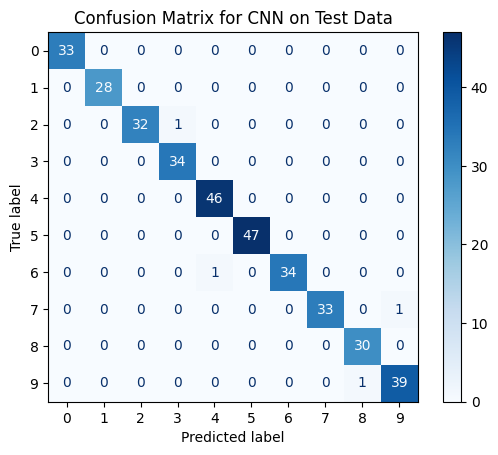

MLP Test Accuracy: 0.9806
CNN Test Accuracy: 0.9889


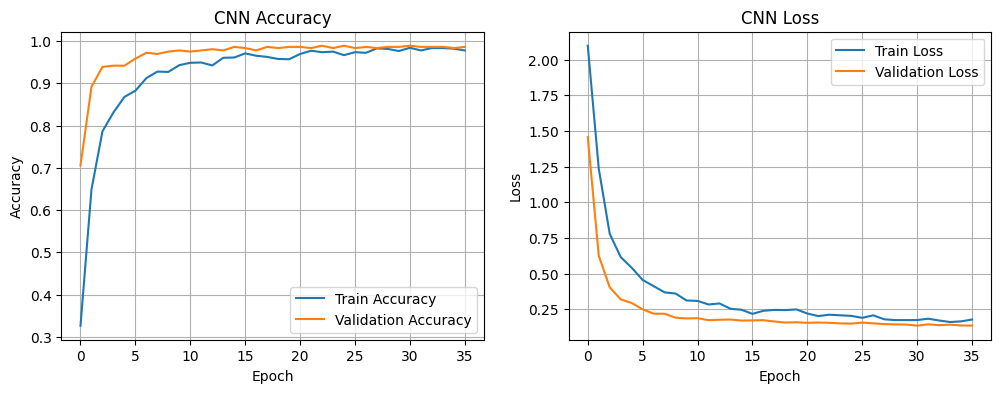

In [37]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# پیش‌بینی روی داده تست
y_pred_cnn_probs = model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_probs, axis=1)
y_test_labels = np.argmax(y_test_cnn, axis=1)

# دقت مدل CNN
from sklearn.metrics import accuracy_score
cnn_test_acc = accuracy_score(y_test_labels, y_pred_cnn)
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

# گزارش طبقه‌بندی CNN
print("\nClassification Report for CNN:")
print(classification_report(y_test_labels, y_pred_cnn, digits=4))

# ماتریس درهم‌ریختگی CNN
cm = confusion_matrix(y_test_labels, y_pred_cnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_labels))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for CNN on Test Data")
plt.show()

# مقایسه دقت CNN و MLP (فرض بر این است که دقت MLP را قبلاً محاسبه کرده‌ای)
print(f"MLP Test Accuracy: {test_acc:.4f}")  # test_acc از کد قبلی MLP
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")

# رسم نمودار دقت و loss آموزش CNN
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Loss')
plt.legend()
plt.grid()

plt.show()
